In [1]:
!pip install rasterio geopandas matplotlib requests

import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile, io
from rasterio.mask import mask


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 60.1 MB/s eta 0:00:00


In [40]:
base_url = "https://raw.githubusercontent.com/atharvpatwardhan/Atharv-Patwardhan-GIS-Coursework/main/data/"


In [29]:
import requests, zipfile, io, os

url = 'https://www.weather.gov/source/gis/Shapefiles/County/s_05mr24.zip'

zip_path = "data/usa_map.zip"
extract_dir = "data/usa_map"

os.makedirs("data", exist_ok=True)


if not os.path.exists(zip_path):
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)
    print("Downloaded USA Map Data")

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_dir)






Downloaded USA Map Data


In [3]:
import os

for f in os.listdir('data/usa_map'):
    print(f)




s_05mr24.shx
s_05mr24.shp
s_05mr24.prj
s_05mr24.dbf


In [4]:
usa_data = gpd.read_file("data/usa_map/s_05mr24.shp")
print(usa_data.head())


  STATE            NAME FIPS        LON       LAT  \
0    AL         Alabama   01  -86.82676  32.79354   
1    AR        Arkansas   05  -92.43920  34.89977   
2    AS  American Samoa   60 -170.37215 -14.26486   
3    AZ         Arizona   04 -111.66457  34.29323   
4    CA      California   06 -119.60818  37.24537   

                                            geometry  
0  MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...  
1  POLYGON ((-91.62986 36.49921, -91.62849 36.499...  
2  MULTIPOLYGON (((-168.14924 -14.53377, -168.148...  
3  POLYGON ((-110.4909 37.00361, -110.4875 37.002...  
4  MULTIPOLYGON (((-118.4262 32.79973, -118.42634...  


In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

usa_data = gpd.read_file("data/usa_map/s_05mr24.shp")

mainland_states = [
    "AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN",
    "KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND",
    "NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD",
    "TN","TX","UT","VA","VT","WA","WI","WV","WY"
]

mainland_usa = usa_data[usa_data["STATE"].isin(mainland_states)]


In [48]:
import pandas as pd

url = "https://www.eia.gov/electricity/data/state/avgprice_annual.xlsx"

electricity_df = pd.read_excel(url, sheet_name="Price", skiprows=1)

print(electricity_df.head())


   Year State Industry Sector Category  Residential  Commercial  Industrial  \
0  2020    AK  Total Electric Industry        22.57       19.58       15.88   
1  2020    AL  Total Electric Industry        12.58       11.55        5.87   
2  2020    AR  Total Electric Industry        10.41        8.61        5.89   
3  2020    AZ  Total Electric Industry        12.27       10.11        6.07   
4  2020    CA  Total Electric Industry        20.45       17.53       14.27   

   Transportation  Other  Total  
0            0.00    NaN  19.82  
1            0.00    NaN   9.84  
2           13.32    NaN   8.32  
3            9.38    NaN  10.44  
4           10.07    NaN  18.00  


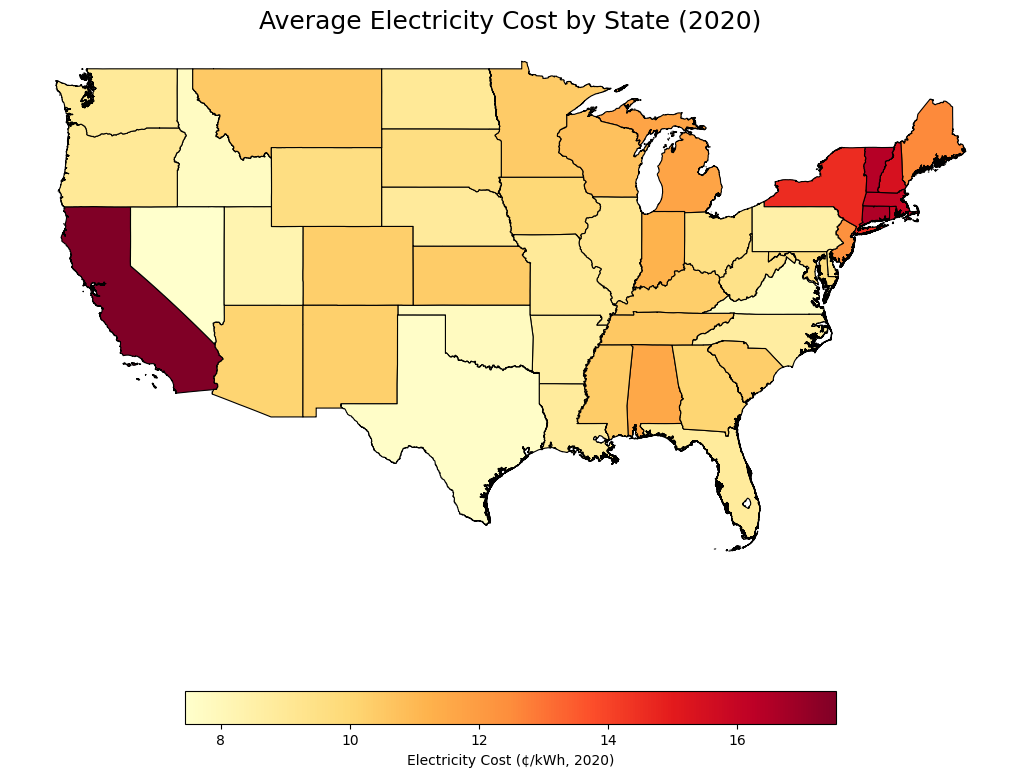

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

usa_data = gpd.read_file("data/usa_map/s_05mr24.shp")


mainland_states = [
    "AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN",
    "KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND",
    "NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD",
    "TN","TX","UT","VA","VT","WA","WI","WV","WY"
]
mainland_usa = usa_data[usa_data["STATE"].isin(mainland_states)]


electricity_df = electricity_df.rename(columns={"State": "STATE", "Commercial": "Electricity_Cost"})

electricity_df = electricity_df[(electricity_df["Year"] == 2020) &
                          (electricity_df["Industry Sector Category"] == "Total Electric Industry")]

electricity_df = electricity_df[["STATE", "Electricity_Cost"]]

merged = mainland_usa.merge(electricity_df, on="STATE", how="left")

fig, ax = plt.subplots(figsize=(14, 10))
merged.plot(
    column="Electricity_Cost",
    cmap="YlOrRd",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Electricity Cost (¢/kWh, 2020)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax
)

ax.set_title("Average Electricity Cost by State (2020)", fontsize=18)
ax.axis("off")
plt.show()


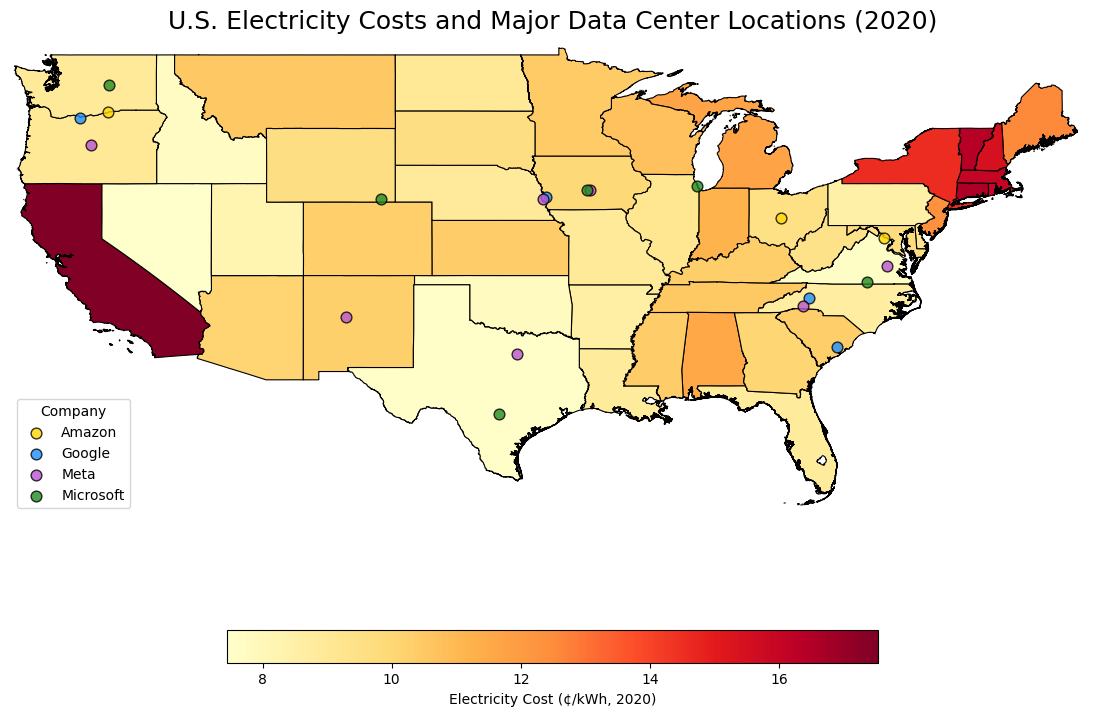

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

usa_data = gpd.read_file("data/usa_map/s_05mr24.shp")

mainland_states = [
    "AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN",
    "KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND",
    "NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD",
    "TN","TX","UT","VA","VT","WA","WI","WV","WY"
]
mainland_usa = usa_data[usa_data["STATE"].isin(mainland_states)]

url = "https://www.eia.gov/electricity/data/state/avgprice_annual.xlsx"

electricity_df = pd.read_excel(url, sheet_name="Price", skiprows=1)


electricity_df = electricity_df.rename(columns={"State": "STATE", "Commercial": "Electricity_Cost"})
electricity_df = electricity_df[
    (electricity_df["Year"] == 2020) &
    (electricity_df["Industry Sector Category"] == "Total Electric Industry")
]
electricity_df = electricity_df[["STATE", "Electricity_Cost"]]

merged = mainland_usa.merge(electricity_df, on="STATE", how="left")

def load_datacenters(path, company):
    df = pd.read_csv(path)
    df = df[df["Country"].str.lower().str.strip() == "united states"]
    df = df[(df["Latitude"] != "-") & (df["Longitude"] != "-")]
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    df["Company"] = company
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]),
        crs="EPSG:4326"
    )
    return gdf

amazon_gdf = load_datacenters(base_url + "amazon_data_centers.csv", "Amazon")
google_gdf = load_datacenters(base_url + "google_data_centers.csv", "Google")
meta_gdf   = load_datacenters(base_url + "meta_data_centers.csv", "Meta")
microsoft_gdf = load_datacenters(base_url + "microsoft_data_centers.csv", "Microsoft")


datacenters = pd.concat([amazon_gdf, google_gdf, meta_gdf, microsoft_gdf])

fig, ax = plt.subplots(figsize=(14, 10))

merged.plot(
    column="Electricity_Cost",
    cmap="YlOrRd",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Electricity Cost (¢/kWh, 2020)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax
)

colors = {
    "Amazon": "gold",
    "Google": "dodgerblue",
    "Meta": "mediumorchid",
    "Microsoft": "forestgreen"
}

for company, group in datacenters.groupby("Company"):
    group.plot(ax=ax, markersize=60, color=colors[company], label=company, alpha=0.8, marker="o", edgecolor="black")

ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
ax.set_aspect('equal')

ax.set_title("U.S. Electricity Costs and Major Data Center Locations (2020)", fontsize=18)
ax.axis("off")
plt.legend(title="Company", loc="lower left", frameon=True)
plt.show()


## Seeing unemployment rates around data center locations

In [10]:
from io import BytesIO

ers_csv_url = "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Unemployment2023.csv"

resp = requests.get(ers_csv_url)
resp.raise_for_status()
ers_df = pd.read_csv(BytesIO(resp.content))

print(ers_df.columns.tolist())

['FIPS_Code', 'State', 'Area_Name', 'Attribute', 'Value']


In [11]:
ers_df.head()

,FIPS_Code,State,Area_Name,Attribute,Value
0,0,US,United States,Civilian_labor_force_2000,142601576.0
1,0,US,United States,Employed_2000,136904853.0
2,0,US,United States,Unemployed_2000,5696723.0
3,0,US,United States,Unemployment_rate_2000,4.0
4,0,US,United States,Civilian_labor_force_2001,143786537.0


In [13]:
ers_pivot = ers_df.pivot_table(
    index="State",
    columns="Attribute",
    values="Value",
    aggfunc="first"
).reset_index()

ers_pivot.columns.name = None
ers_pivot = ers_pivot.rename(columns={"State": "STATE"})
ers_pivot.head()

,STATE,Civilian_labor_force_2000,Civilian_labor_force_2001,Civilian_labor_force_2002,Civilian_labor_force_2003,Civilian_labor_force_2004,Civilian_labor_force_2005,Civilian_labor_force_2006,Civilian_labor_force_2007,Civilian_labor_force_2008,...,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022,Unemployment_rate_2023,Urban_Influence_Code_2013
0,AK,319777.0,321652.0,327054.0,332494.0,337469.0,344157.0,348756.0,350233.0,355298.0,...,6.3,6.6,6.5,6.0,5.6,8.3,6.4,4.2,4.2,12.0
1,AL,2147173.0,2128027.0,2112621.0,2128668.0,2138306.0,2140356.0,2170007.0,2180448.0,2176854.0,...,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.5,2.5,2.0
2,AR,1260507.0,1261419.0,1276964.0,1282578.0,1302378.0,1333880.0,1346532.0,1350811.0,1357716.0,...,5.0,4.0,3.7,3.7,3.5,6.2,4.0,3.2,3.3,6.0
3,AZ,2510611.0,2593664.0,2683502.0,2728649.0,2788618.0,2862517.0,2970679.0,3018805.0,3095993.0,...,6.1,5.5,5.0,4.8,4.8,7.8,5.1,3.8,3.9,6.0
4,CA,16837536.0,17096428.0,17246528.0,17271899.0,17374506.0,17537931.0,17661179.0,17910726.0,18179907.0,...,6.3,5.5,4.8,4.2,4.1,10.1,7.3,4.3,4.8,1.0


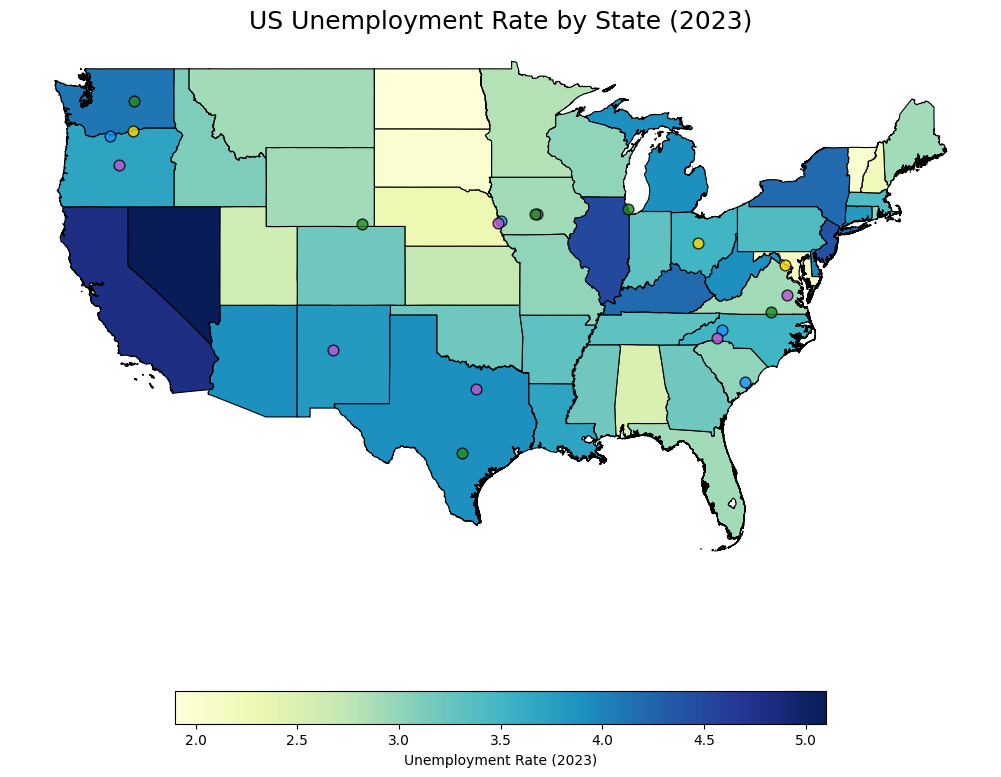

In [ ]:
merged = mainland_usa.merge(ers_pivot, on="STATE", how="left")

fig, ax = plt.subplots(figsize=(14, 10))
merged.plot(
    column="Unemployment_rate_2023",
    cmap="YlGnBu",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Unemployment Rate (2023)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax
)

ax.set_title("US Unemployment Rate by State (2023)", fontsize=18)
ax.axis("off")

for company, group in datacenters.groupby("Company"):
    group.plot(ax=ax, markersize=60, color=colors[company], label=company, alpha=0.8, marker="o", edgecolor="black")



### We observe that there is no extreme unemployment in the states where data centers exist.

In [25]:
os.getcwd()

'/content/data'

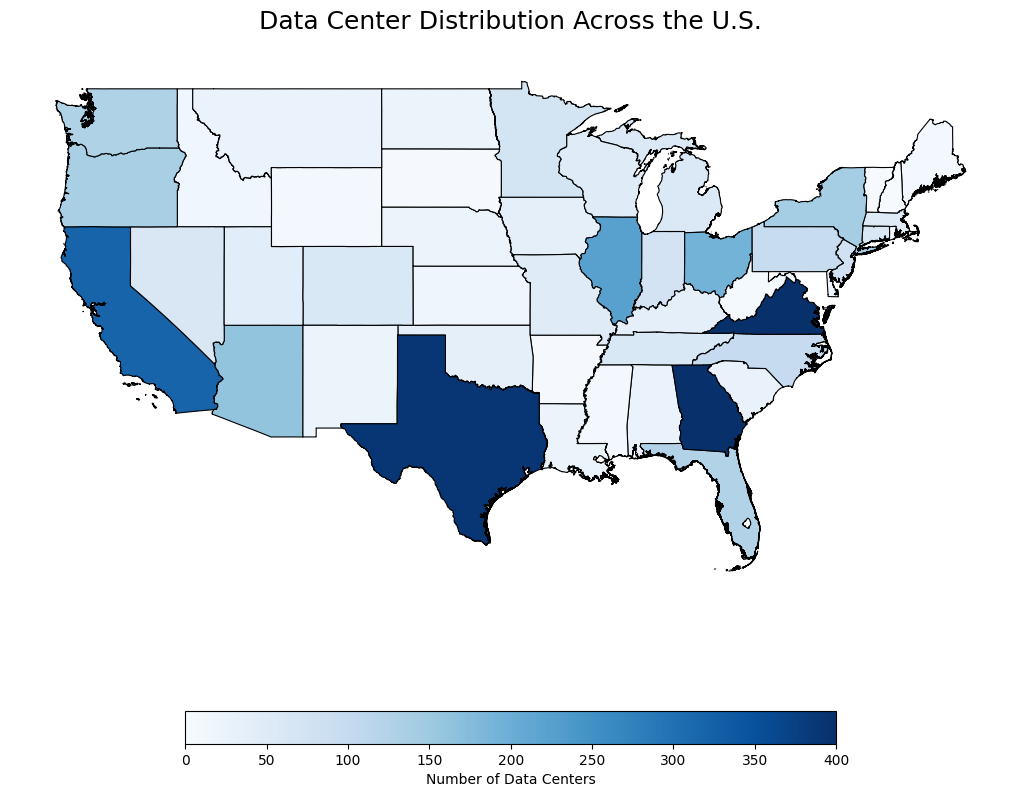

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

usa_data = gpd.read_file("data/usa_map/s_05mr24.shp")

mainland_states = [
    "AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN",
    "KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND",
    "NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD",
    "TN","TX","UT","VA","VT","WA","WI","WV","WY"
]
mainland_usa = usa_data[usa_data["STATE"].isin(mainland_states)]

dc_df = pd.read_csv(base_url + "datacenter_counts_by_state.csv")

us_abbrev = {
    "Alabama":"AL", "Alaska":"AK", "Arizona":"AZ", "Arkansas":"AR", "California":"CA", "Colorado":"CO",
    "Connecticut":"CT", "Delaware":"DE", "Florida":"FL", "Georgia":"GA", "Hawaii":"HI", "Idaho":"ID",
    "Illinois":"IL", "Indiana":"IN", "Iowa":"IA", "Kansas":"KS", "Kentucky":"KY", "Louisiana":"LA",
    "Maine":"ME", "Maryland":"MD", "Massachusetts":"MA", "Michigan":"MI", "Minnesota":"MN",
    "Mississippi":"MS", "Missouri":"MO", "Montana":"MT", "Nebraska":"NE", "Nevada":"NV",
    "New Hampshire":"NH", "New Jersey":"NJ", "New Mexico":"NM", "New York":"NY", "North Carolina":"NC",
    "North Dakota":"ND", "Ohio":"OH", "Oklahoma":"OK", "Oregon":"OR", "Pennsylvania":"PA",
    "Rhode Island":"RI", "South Carolina":"SC", "South Dakota":"SD", "Tennessee":"TN", "Texas":"TX",
    "Utah":"UT", "Vermont":"VT", "Virginia":"VA", "Washington":"WA", "West Virginia":"WV",
    "Wisconsin":"WI", "Wyoming":"WY"
}
dc_df["STATE"] = dc_df["State"].map(us_abbrev)

merged = mainland_usa.merge(dc_df, on="STATE", how="left")

fig, ax = plt.subplots(figsize=(14, 10))
merged.plot(
    column="DataCenters",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    vmin=0,
    vmax=400,
    legend_kwds={
        "label": "Number of Data Centers",
        "orientation": "horizontal",
        "shrink": 0.6
    },
    ax=ax
)

ax.set_title("Data Center Distribution Across the U.S.", fontsize=18, pad=20)
ax.axis("off")

plt.show()


/tmp/ipython-input-2755228164.py:15: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  gdf_sed_mainland = gpd.sjoin(gdf_sed, mainland_usa[["STATE", "geometry"]], how="inner", predicate="within")


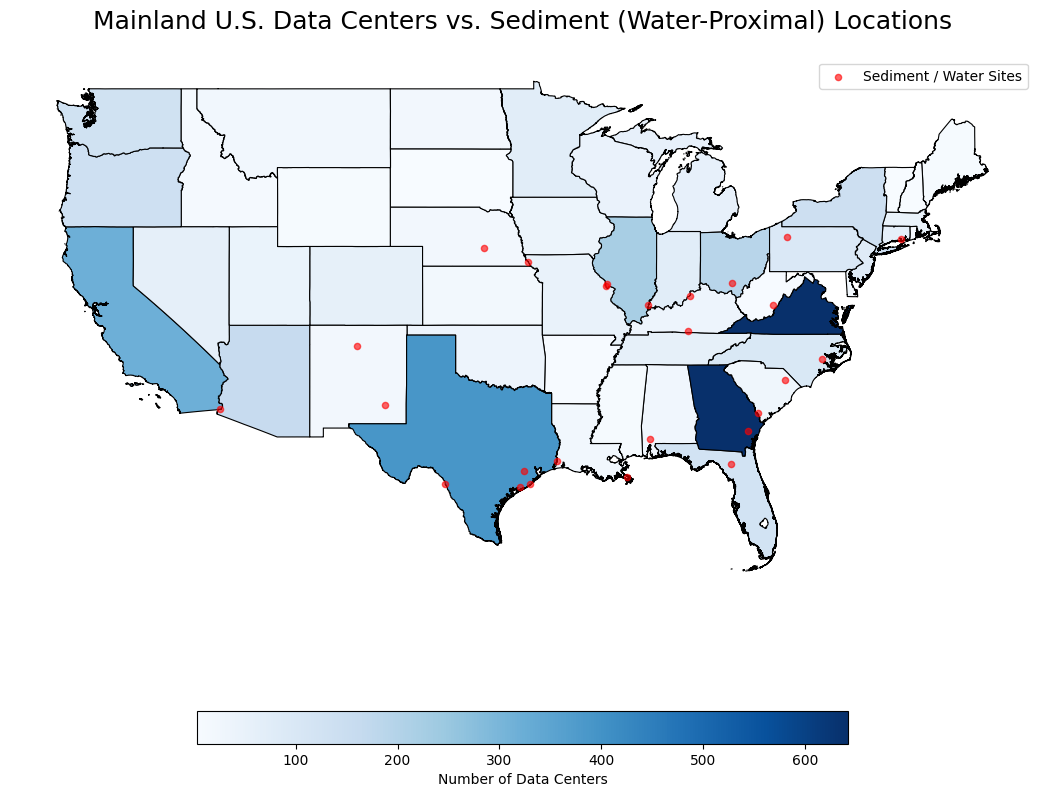

In [36]:
import geopandas as gpd
import pandas as pd

sediments = pd.read_csv(base_url + "SedimentDatabase_Locations.csv")

usa_sed = sediments[sediments["Country"].str.contains("USA", na=False)].copy()
usa_sed = usa_sed.dropna(subset=["Lat_deg", "Lon_deg"])

gdf_sed = gpd.GeoDataFrame(
    usa_sed,
    geometry=gpd.points_from_xy(usa_sed["Lon_deg"], usa_sed["Lat_deg"]),
    crs="EPSG:4326"
)

gdf_sed_mainland = gpd.sjoin(gdf_sed, mainland_usa[["STATE", "geometry"]], how="inner", predicate="within")


fig, ax = plt.subplots(figsize=(14, 10))

merged.plot(
    column="DataCenters",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={
        "label": "Number of Data Centers",
        "orientation": "horizontal",
        "shrink": 0.6
    },
    ax=ax
)

gdf_sed_mainland.plot(
    ax=ax,
    color="red",
    markersize=20,
    alpha=0.6,
    label="Sediment / Water Sites"
)

ax.set_title("Mainland U.S. Data Centers vs. Sediment (Water-Proximal) Locations", fontsize=18, pad=20)
ax.axis("off")
plt.legend()
plt.show()


In [41]:
electricity_df = pd.read_excel(base_url + "generation_monthly.xlsx")
print(electricity_df.columns)


Index(['YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE',
       'GENERATION (Megawatthours)'],
      dtype='object')


In [5]:
electricity_df["STATE"].unique()[:20]


array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA'], dtype=object)

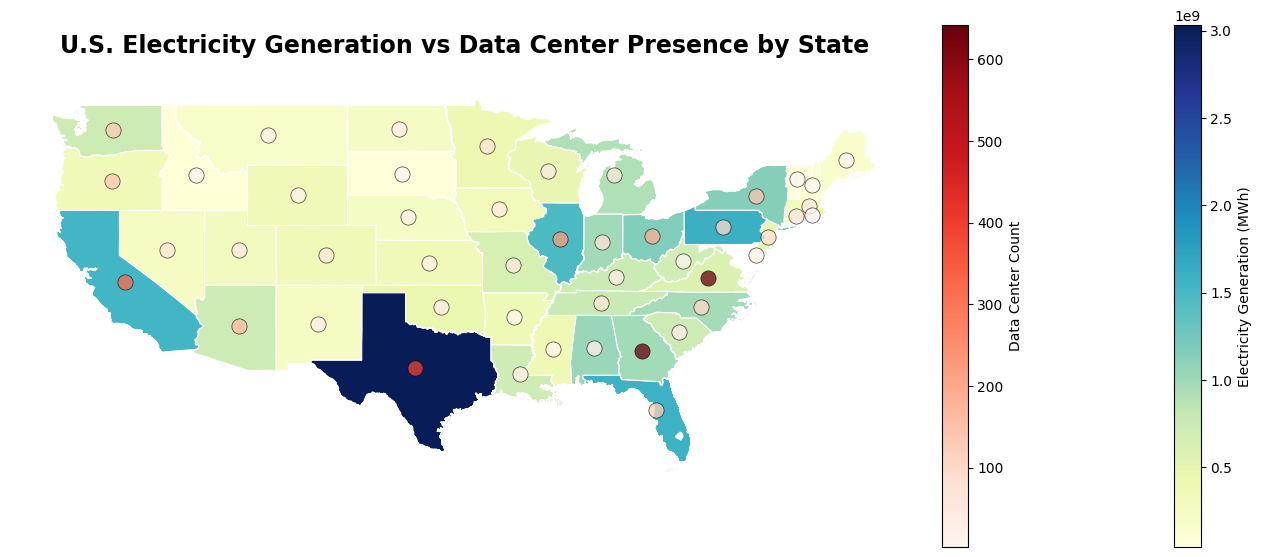

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

datacenters_df = pd.read_csv(base_url + "datacenter_counts_by_state.csv")
electricity_df = pd.read_excel(base_url + "generation_monthly.xlsx")

us_state_map = {
    'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California',
    'CO':'Colorado','CT':'Connecticut','DE':'Delaware','FL':'Florida','GA':'Georgia',
    'HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas',
    'KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts',
    'MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana',
    'NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico',
    'NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma',
    'OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina',
    'SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
    'VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming'
}

electricity_df['State'] = electricity_df['STATE'].map(us_state_map)

electricity_state = (
    electricity_df.groupby('State', as_index=False)['GENERATION (Megawatthours)']
    .sum()
    .rename(columns={'GENERATION (Megawatthours)': 'Generation_MWh'})
)

merged_df = pd.merge(datacenters_df, electricity_state, on='State', how='left')

usa_states = gpd.read_file("data/usa_map/s_05mr24.shp")
usa_states = usa_states[~usa_states["NAME"].isin(["Hawaii", "Alaska", "Puerto Rico"])]

merged_geo = usa_states.merge(merged_df, left_on="NAME", right_on="State", how="left")

fig, ax = plt.subplots(figsize=(14, 9))
ax.set_facecolor("#F9F9F9")

merged_geo.plot(
    column='Generation_MWh',
    cmap='YlGnBu',  # teal-blue map
    linewidth=0.8,
    ax=ax,
    edgecolor='white',
    legend=True,
    legend_kwds={'label': "Electricity Generation (MWh)", 'shrink': 0.6}
)

norm = Normalize(vmin=merged_geo['DataCenters'].min(), vmax=merged_geo['DataCenters'].max())
cmap = plt.cm.Reds

for _, row in merged_geo.dropna(subset=['DataCenters']).iterrows():
    plt.scatter(
        row.geometry.centroid.x,
        row.geometry.centroid.y,
        s=120,  # constant radius
        color=cmap(norm(row['DataCenters'])),
        alpha=0.75,
        edgecolor='black',
        linewidth=0.5
    )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # required for colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
cbar.set_label("Data Center Count", fontsize=10)

plt.title(
    "U.S. Electricity Generation vs Data Center Presence by State",
    fontsize=17,
    weight='bold',
    pad=20
)
plt.axis('off')
plt.tight_layout()
plt.show()
